# Teamwork vs. Individual Performance in Esports Game Overwatch
## DS121 Final Project
### Peiyang Liu

### Introduction

Overwatch is a PvP (players vs. players) first-person shooter game released by Blizzard Entertainment in 2016, which had gained a large number of players worldwide in a short period of time, and it is still one of the most popular computer games now. Unlike traditional first-person shooter (FPS) games like Counter-Strike series, Overwatch is very team-based, which means that it requires players not only to have a good aiming skill, but also to have sufficient strategy, decision-making skills, and team awareness. A complete team contains five players playing three different roles: tanks, damages, and supports. Players need to use their different abilities, and only by working together, with each roles doing thier own job, can they have the best chance of winning. On the contrary, unexpected death caused by separation from the  team will often bring disadvantage to the whole team. However, nothing is absolute, and sometimes early kills from individual heroism in the game can give the team a numerical advantage. Therefore, there is a topic that has been discussed by Overwatch players all the time: is teamwork or individual performance more important? This project will try to answer this question from a data science perspective.

### Data

The dataset used in this project was taken from the official Stats Lab of the Overwatch League, a worldwide professional esports league run by Blizzard Entertainment for the Overwatch. Each year, the top 20 teams from around the world battle it out for the yearly championship. This means that this dataset records the performance of the highest level of Overwatch players, which will make the analysis in this essay more representative. The dataset includes all the game character data used by each player on the field in each Overwatch League match in 2022.



In [1]:
### import libraries and the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

player_data = pd.read_csv('phs-2022.csv')

In [2]:
player_data.head()

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,amount
0,2022-05-05 19:10:00 UTC,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,All Damage Done,All Heroes,11560.871071
1,2022-05-05 19:10:00 UTC,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Assists,All Heroes,15.000000
2,2022-05-05 19:10:00 UTC,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Average Time Alive,All Heroes,83.394003
3,2022-05-05 19:10:00 UTC,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Barrier Damage Done,All Heroes,4265.500527
4,2022-05-05 19:10:00 UTC,38971,Kickoff Clash: Qualifiers,control,Lijiang Tower,FunnyAstro,Los Angeles Gladiators,Damage - Quick Melee,All Heroes,135.000000


As shown above, this dataset contains these columns:   
- start_time: the time that the match started
- esports_match_id: unique id that represents every match
- tournament_tile: the name of tournament that the match was in
- map_type: the type of the game map
- map_name: the name of the game map
- player_name: the name the player 
- team_name: the name of the team that the player was in
- stat_name: the type of statistics this row records, includes All Damage Done, Eliminations, Weapon Accuracy, Deaths, and Time Played data that are going to be used in the following anaysis
- hero_name: the game character that the player was using
- amount: the recorded value of the statistics in stat_name


### Methodology
In Overwatch, the number of deaths often represents one’s ability to work together as a team. One death can be caused by many reasons, either because the damages role is wrongly positioned, or because the tank did not block the damage in time, or because the support did not heal in time. In short, any mistake made by a single role can easily bring a character's death. Hence, number of deaths directly reflects a character's team spirit and game awareness. Therefore I will quantify teamwork spirit by using the number of deaths per minute.   


Weapon accuracy, on the other hand, represents a player's aiming skill, which is an absolute  individual strength. Players who have strong FPS aiming skill also perform very well in other FPS games. Therefore I will quantify individual strength by using average weapon accuracy.   


Fewer deaths represent longer survival time (with respawn time penalties for each death), which means players can get more kills. A higher weapon accuracy rate represents better aiming ability, and the higher the probability that a player will cause a kill by firing weapon.  Therefore, I will quantify the positive benefits to the match result caused by players by number of eliminations per minute.


Since different characters have different responsibilities and some characters are difficult to measure strength through stats, I will use the stats of Tracer, a hero who has great mobility and attacks with a short range submachine gun, which requires a high level of damage avoidance skill and aiming skills from the player. It will be very representative of the way the game is played: the need to use skills to avoid damage while shooting accurately.   


I will use the Least Squares Regression Line to answer the question of which has a greater impact on the number of deaths per minute, weapon accuracy or deaths per minute.
Since weapon accuracy and deaths per minute have completely different units (percentages and counts), in order to make this comparison valid, it is important to first standardize these variables before performing a regression analysis.


### Analysis
In order to get the data we want, it's important to perform some data cleaning and preprocessing:

In [3]:
# Select only the columns that we need:
player_df = player_data[['esports_match_id','player_name','team_name','stat_name','hero_name','amount']]

# Hero name, select only Tracer:
player_df = player_df[player_df['hero_name'] == 'Tracer'] 

# Select rows contain All Damage Done, Eliminations, Weapon Accuracy, Deaths, and Time Played in stat_name:
player_df = player_df[player_df['stat_name'].isin(['All Damage Done','Eliminations','Weapon Accuracy','Deaths','Time Played'])]

player_df = player_df.drop(columns = ['hero_name'])
player_df

,esports_match_id,player_name,team_name,stat_name,amount
151,38971,Patiphan,Los Angeles Gladiators,All Damage Done,669.000000
160,38971,Patiphan,Los Angeles Gladiators,Eliminations,3.000000
184,38971,Patiphan,Los Angeles Gladiators,Time Played,27.248463
186,38971,Patiphan,Los Angeles Gladiators,Weapon Accuracy,0.324074
1081,38971,Patiphan,Los Angeles Gladiators,All Damage Done,3312.476869
...,...,...,...,...,...
1045049,39329,Finale,Toronto Defiant,All Damage Done,1949.500000
1045058,39329,Finale,Toronto Defiant,Deaths,3.000000
1045059,39329,Finale,Toronto Defiant,Eliminations,1.000000
1045081,39329,Finale,Toronto Defiant,Time Played,184.952780


In [4]:
# Reshape the dataframe using filter:
DMG = player_df[player_df['stat_name'] == 'All Damage Done']
Dth = player_df[player_df['stat_name'] == 'Deaths']
Time = player_df[player_df['stat_name'] == 'Time Played']
Accu = player_df[player_df['stat_name'] == 'Weapon Accuracy']
Kill = player_df[player_df['stat_name'] == 'Eliminations']

In [5]:
# Damage:
# Since one player can play a hero in multiple rounds in a match, we need to get the sum of all data
DMG = DMG.groupby((['esports_match_id','player_name'])).sum()  
DMG

amount
esports_match_id player_name              
38971            Flora         7474.251641
                 Patiphan      8060.130657
                 kevster      12473.657650
38972            Glister       1399.500000
                 Proper        3407.866471
...                                    ...
39391            Jinmu         6923.905105
                 Leave        22094.612163
39392            Jinmu         7183.688566
                 Leave        22191.223145
                 Pineapple    53875.249078

[671 rows x 1 columns]

In [6]:
# Time played:
# Since one player can play a hero in multiple rounds in a match, we need to get the sum of all data
Time = Time.groupby((['esports_match_id','player_name'])).sum()
Time

amount
esports_match_id player_name             
38971            Flora         506.113339
                 Patiphan      508.093644
                 kevster      1084.296158
38972            Glister        52.538557
                 Proper        276.402612
...                                   ...
39391            Jinmu         656.950553
                 Leave        1528.174617
39392            Jinmu         526.548633
                 Leave        1611.753740
                 Pineapple    2844.975128

[717 rows x 1 columns]

In [7]:
# Number of death:
# Since one player can play a hero in multiple rounds in a match, we need to get the sum of all data
Dth = Dth.groupby((['esports_match_id','player_name'])).sum()
Dth

amount
esports_match_id player_name        
38971            Flora           2.0
                 Patiphan        5.0
                 kevster         9.0
38972            Glister         1.0
                 Proper          1.0
...                              ...
39391            Jinmu           6.0
                 Leave           6.0
39392            Jinmu           5.0
                 Leave          17.0
                 Pineapple      20.0

[611 rows x 1 columns]

In [8]:
# Weapon accuracy:
# Use mean to get the average of Weapon accuracy in each match
Accu = Accu.groupby((['esports_match_id','player_name'])).mean()
Accu

amount
esports_match_id player_name          
38971            Flora        0.366374
                 Patiphan     0.350676
                 kevster      0.285498
38972            Glister      0.445652
                 Proper       0.375850
...                                ...
39391            Jinmu        0.265609
                 Leave        0.294036
39392            Jinmu        0.257456
                 Leave        0.282324
                 Pineapple    0.354562

[670 rows x 1 columns]

In [9]:
# Elimination
# Since one player can play a hero in multiple rounds in a match, we need to get the sum of all data
Kill = Kill.groupby((['esports_match_id','player_name'])).sum()
Kill

amount
esports_match_id player_name        
38971            Flora          24.0
                 Patiphan       26.0
                 kevster        20.0
38972            Glister         1.0
                 Proper         14.0
...                              ...
39391            Jinmu           9.0
                 Leave          59.0
39392            Jinmu          14.0
                 Leave          48.0
                 Pineapple      88.0

[598 rows x 1 columns]

In [10]:
# merge the three dataframe into one
player_stats = DMG.merge(Time, how='left',on=['esports_match_id','player_name']).merge(Dth, how='left',on=['esports_match_id','player_name'],suffixes = ('_z','_a')).merge(Accu, how='left',on=['esports_match_id','player_name'],suffixes = ('_b','_d')).merge(Kill, how='left',on=['esports_match_id','player_name'],suffixes = ('_e','_f'))

# rename:        
player_stats = player_stats.rename({'amount_x': 'DMG', 'amount_y': 'Time','amount_b': 'Death','amount_d':'Accuracy','amount': 'Kill'}, axis=1)

# change NaN to 0 (only happened in number of death, i.e. did not die in the whole round):
player_stats = player_stats.fillna(0)


player_stats

DMG         Time  Death  Accuracy  Kill
esports_match_id player_name                                                  
38971            Flora         7474.251641   506.113339    2.0  0.366374  24.0
                 Patiphan      8060.130657   508.093644    5.0  0.350676  26.0
                 kevster      12473.657650  1084.296158    9.0  0.285498  20.0
38972            Glister       1399.500000    52.538557    1.0  0.445652   1.0
                 Proper        3407.866471   276.402612    1.0  0.375850  14.0
...                                    ...          ...    ...       ...   ...
39391            Jinmu         6923.905105   656.950553    6.0  0.265609   9.0
                 Leave        22094.612163  1528.174617    6.0  0.294036  59.0
39392            Jinmu         7183.688566   526.548633    5.0  0.257456  14.0
                 Leave        22191.223145  1611.753740   17.0  0.282324  48.0
                 Pineapple    53875.249078  2844.975128   20.0  0.354562  88.0

[671 rows x 5 columns]

In [11]:
# In order get the stats per minute, we need to do some calculation base on the time played,
# and add the results as new columns to the dataframe:

player_stats['DMG/Min'] = player_stats['DMG']/player_stats['Time']*60
player_stats['Death/Min'] = player_stats['Death']/player_stats['Time']*60
player_stats['Kill/Min'] = player_stats['Kill']/player_stats['Time']*60

# To keep the data valid, only use data with a playtime greater than 100 seconds
player_stats = player_stats.loc[player_stats['Time'] > 100]

In [12]:
# Standardize the data:

# idea retrieve from
# Jim Frost, Identifying the Most Important Independent Variables in Regression Models: 
# https://statisticsbyjim.com/regression/identifying-important-independent-variables/

df = player_stats[['Death/Min','Accuracy','Kill/Min']]


# use StandardScaler, some codes cited from
# Misha S, How to Standardize Data in Python:
# https://towardsdatascience.com/how-to-standardize-data-in-python-d3e73f4ccf3c

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
df = pd.DataFrame(standardized_data, columns = df.columns)
df

,Death/Min,Accuracy,Kill/Min
0,-1.189560,0.745080,1.839989
1,0.339920,0.413299,2.183532
2,-0.060146,-0.964337,-0.813419
3,-1.276246,0.945380,2.135828
4,-1.160892,-0.043982,1.961286
...,...,...,...
541,0.156145,-1.384704,-1.247990
542,-1.196164,-0.783875,1.033020
543,0.250342,-1.557039,-0.067711
544,0.523491,-1.031423,0.224689


At this point, we have all the data we need to analyze. The following will use the least square regression line to analyze:

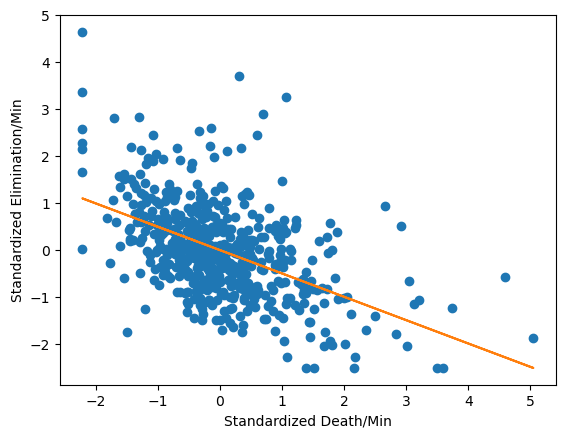

|m| = 0.4974367396118431


In [13]:
# Use np.linalg.lstsq to get the least square line of the data
# some codes cited from Homework 7 Question 3 and
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

x1 = df['Death/Min']
x2 = df['Accuracy']
y = df['Kill/Min']

A = np.vstack([x1, np.ones(len(x1))]).T

# Visualization:
plt.plot(x1,y,'o')
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x1, m*x1+c)
plt.xlabel("Standardized Death/Min")
plt.ylabel("Standardized Elimination/Min")
plt.show()
print("|m| =", abs(m))

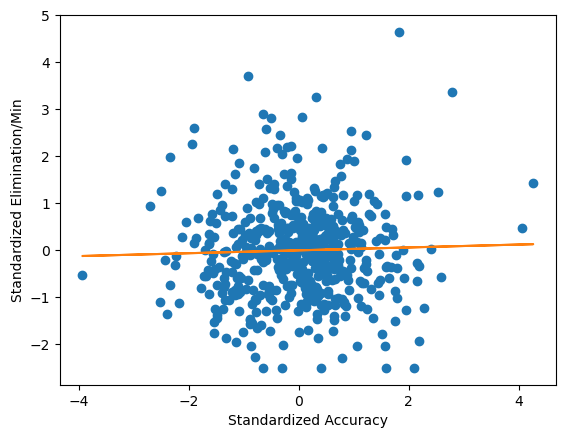

|m| = 0.030672301500216773


In [14]:
A = np.vstack([x2, np.ones(len(x2))]).T

plt.plot(x2,y,'o')
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
plt.plot(x2, m*x2+c)
plt.xlabel("Standardized Accuracy")
plt.ylabel("Standardized Elimination/Min")
plt.show()
print("|m| =", abs(m))

### Result
Since the data for conducting the analysis has been standardized, this means that both weapon accuracy and deaths per minute have been placed in the same scale and it is reasonable to compare their linear regressions. Based on the above analysis and visualization, I find that the absolute value of the slope of the linear regression for deaths per minute vs. elimination per minute is approximately 0.4987, while the absolute value of the slope of the linear regression for accuracy vs. elimination per minute is approximately 0.0306. The former value is more than sixteen times larger than the latter. As in the two visualization plots, death per minute possesses a steeper regression line. These results show that death per minute has a more decisive effect on elimination per minute than accuracy. Therefore, we can perhaps generalize that it is more important to reduce the number of deaths than to improve the accuracy in game. In other words, better teamwork can bring more benefits than better individual strength in Overwatch.



### Conclusion
In this project, I used game data from 2022 Overwatch League pro players, and after some data cleaning and standardization, compared the impact of deaths per minute and weapon accuracy on elimination per minute via least square linear regression. I found that reducing the number of deaths brings more intuitive benefits to the game than boosting the weapon accuracy. With this finding, I generalize that teamwork is more important than individual strength in the game Overwatch.

### References

- Data used:   
https://assets.blz-contentstack.com/v3/assets/blt321317473c90505c/blte15a905c88e7f5a3/63597255b81bb7383c998205/phs-2022.zip

- Overwatch League Stats Lab:   
https://overwatchleague.com/en-us/statslab

- Jim Frost, *Identifying the Most Important Independent Variables in Regression Models*:   
https://statisticsbyjim.com/regression/identifying-important-independent-variables/ 

- Misha S, *How to Standardize Data in Python*:   
https://towardsdatascience.com/how-to-standardize-data-in-python-d3e73f4ccf3c

- Codes used to make the least square regression line:     
From Homework 7 Question 3, and
https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
